In [ ]:
# FCN for semantic segmentation
# what objects are there and where they are located


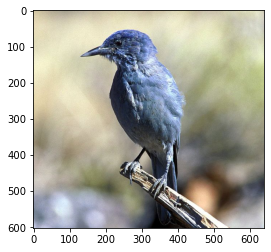

In [7]:
# Load a sample image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/Users/margaritasison/Desktop/bird.jpeg')
plt.imshow(img)

In [8]:
# Preprocess the image
import torchvision.transforms as T
trf = T.Compose([T.Resize(256), # Why 256?
                T.CenterCrop(224), # CenterCrop to 224 x 224
                T.ToTensor(), # Convert to tensor -- values will be scaled from 0 to 1
                T.Normalize(mean = [0.485, 0.456, 0.406], # Normalize to ImageNet mean
                            std = [0.229, 0.224, 0.225])]) # Normalize to ImageNet std
inp = trf(img).unsqueeze(0) # This step changes the dimensions from 1 x C x H x W to C x H x W

In [11]:
import torch
fcn = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained=True)
# or
# model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet101', pretrained=True)
fcn.eval()

Using cache found in /Users/margaritasison/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/margaritasison/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/margaritasison/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [12]:
# Forward pass the input through the network
out = fcn(inp)['out']
print(out.shape)


torch.Size([1, 21, 224, 224])


In [13]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print(om.shape)

(224, 224)


In [14]:
print(np.unique(om))

[0 3]


In [21]:
# Decode the output

# Define a helper function
def decode_segmap(image, nc=21):

    label_colors = np.array([(0, 0, 0), # 0=background
                             # add labels
                             (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                             (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                             (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                             (0, 64, 0), (128, 64, 0), (0, 192, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

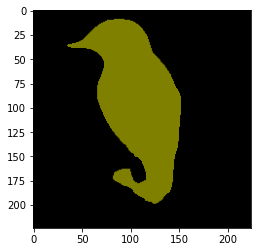

In [22]:
rgb = decode_segmap(om)
plt.imshow(rgb)

In [ ]:
# From Jen
# --------
# # Create a VideoReader object to read the video file.
# video_reader = imageio.get_reader(path + 'grayvid.mp4')

# # Define the output directory where the .png images will be saved.
# output_directory = '/Users/jenholmberg/Workspace/love2learn/fourierfun/media/graypng/'

# # Loop through each frame and save it as a .png image.
# for frame_num, frame in enumerate(video_reader):
#     # Create the filename for the current frame.
#     filename = f'{output_directory}frame_{frame_num:04d}.png'

#     # Save the frame as a .png image.
#     imageio.imwrite(filename, frame)

# # Close the VideoReader object.
# video_reader.close()